In [1]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 
2022-05-02 11:13:54


In [2]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

### Snow Depth

In [12]:
# read in CSV file for each winter
#
snow_depth = pd.read_csv ("D:/Users/aster/Desktop/SNOW_DEPTH_2022_04_20/SnowDepth_WhiteDzud_3hr.csv")
df1 = pd.DataFrame(snow_depth)
df1

DateTime  Arkhangai  BayanUlgii  Bayankhongor    Bulgan  \
0      2000-01-01 00:00:00   0.020283    0.163833      0.009550  0.096350   
1      2000-01-01 03:00:00   0.020587    0.166380      0.010599  0.102729   
2      2000-01-01 06:00:00   0.020758    0.168298      0.010686  0.104631   
3      2000-01-01 09:00:00   0.020753    0.170367      0.011013  0.104701   
4      2000-01-01 12:00:00   0.020737    0.172809      0.011085  0.104693   
...                    ...        ...         ...           ...       ...   
62458  2021-05-17 06:00:00   0.007534    0.040299      0.000177  0.003062   
62459  2021-05-17 09:00:00   0.017269    0.038307      0.000541  0.014380   
62460  2021-05-17 12:00:00   0.026892    0.037231      0.001034  0.031798   
62461  2021-05-17 15:00:00   0.030476    0.037139      0.001075  0.033557   
62462  2021-05-17 18:00:00   0.031174    0.037048      0.001062  0.033766   

       DarkhanUul    Dornod  Dornogovi  Dundgovi  GoviAltai  ...  Khuvsgul  \
0        0.059797  0.031030   0.009782  0.005413   0.008964  ...  0.108549   
1        0.059687  0.031119   0.010982  0.006481   0.011329  ...  0.108284   
2        0.059558  0.031808   0.012226  0.012007   0.011671  ...  0.108130   
3        0.059515  0.032122   0.013671  0.013168   0.011998  ...  0.108207   
4        0.059494  0.036289   0.015174  0.014477   0.012026  ...  0.108260   
...           ...       ...        ...       ...        ...  ...       ...   
62458    0.000195  0.000130   0.000000  0.000000   0.000119  ...  0.057832   
62459    0.000000  0.000058   0.000000  0.000000   0.000899  ...  0.064206   
62460    0.000038  0.000045   0.000000  0.000040   0.000511  ...  0.069382   
62461    0.000043  0.000045   0.000000  0.001244   0.000487  ...  0.070322   
62462    0.000144  0.000138   0.000307  0.008826   0.000490  ...  0.070464   

         Orkhon   Selenge  Sukhbaatar       Tuv  Ulaanbaatar  Umnugovi  \
0      0.075811  0.090601    0.009469  0.024535     0.020010  0.001197   
1      0.086285  0.092040    0.009875  0.028300     0.019886  0.001326   
2      0.087865  0.092201    0.010242  0.032270     0.019819  0.001567   
3      0.087865  0.092158    0.010644  0.032287     0.019830  0.002670   
4      0.087876  0.092158    0.011824  0.032314     0.019814  0.003457   
...         ...       ...         ...       ...          ...       ...   
62458  0.013855  0.003371    0.000000  0.000942     0.000044  0.000000   
62459  0.040386  0.002866    0.000000  0.000808     0.000009  0.000000   
62460  0.065363  0.004733    0.000000  0.010807     0.020670  0.000000   
62461  0.064970  0.005639    0.000000  0.027397     0.040836  0.000000   
62462  0.064434  0.007262    0.001130  0.044766     0.048595  0.000011   

            Uvs  Uvurkhangai   Zavkhan  
0      0.277315     0.013051  0.060852  
1      0.277718     0.013982  0.061050  
2      0.278051     0.023664  0.060873  
3      0.278708     0.024279  0.060922  
4      0.279360     0.024738  0.060971  
...         ...          ...       ...  
62458  0.016939     0.000012  0.016802  
62459  0.014812     0.000000  0.023617  
62460  0.012470     0.006496  0.024374  
62461  0.012469     0.010414  0.024310  
62462  0.012437     0.013189  0.024236  

[62463 rows x 23 columns]

In [14]:
df1.dtypes

DateTime         object
Arkhangai       float64
BayanUlgii      float64
Bayankhongor    float64
Bulgan          float64
DarkhanUul      float64
Dornod          float64
Dornogovi       float64
Dundgovi        float64
GoviAltai       float64
Govisumber      float64
Khentii         float64
Khovd           float64
Khuvsgul        float64
Orkhon          float64
Selenge         float64
Sukhbaatar      float64
Tuv             float64
Ulaanbaatar     float64
Umnugovi        float64
Uvs             float64
Uvurkhangai     float64
Zavkhan         float64
dtype: object

In [16]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'])

In [17]:
df1.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

In [18]:
#Set DateTime as index
#
df1= df1.set_index('DateTime')
df1

Arkhangai  BayanUlgii  Bayankhongor    Bulgan  \
DateTime                                                             
2000-01-01 00:00:00   0.020283    0.163833      0.009550  0.096350   
2000-01-01 03:00:00   0.020587    0.166380      0.010599  0.102729   
2000-01-01 06:00:00   0.020758    0.168298      0.010686  0.104631   
2000-01-01 09:00:00   0.020753    0.170367      0.011013  0.104701   
2000-01-01 12:00:00   0.020737    0.172809      0.011085  0.104693   
...                        ...         ...           ...       ...   
2021-05-17 06:00:00   0.007534    0.040299      0.000177  0.003062   
2021-05-17 09:00:00   0.017269    0.038307      0.000541  0.014380   
2021-05-17 12:00:00   0.026892    0.037231      0.001034  0.031798   
2021-05-17 15:00:00   0.030476    0.037139      0.001075  0.033557   
2021-05-17 18:00:00   0.031174    0.037048      0.001062  0.033766   

                     DarkhanUul    Dornod  Dornogovi  Dundgovi  GoviAltai  \
DateTime                                                                    
2000-01-01 00:00:00    0.059797  0.031030   0.009782  0.005413   0.008964   
2000-01-01 03:00:00    0.059687  0.031119   0.010982  0.006481   0.011329   
2000-01-01 06:00:00    0.059558  0.031808   0.012226  0.012007   0.011671   
2000-01-01 09:00:00    0.059515  0.032122   0.013671  0.013168   0.011998   
2000-01-01 12:00:00    0.059494  0.036289   0.015174  0.014477   0.012026   
...                         ...       ...        ...       ...        ...   
2021-05-17 06:00:00    0.000195  0.000130   0.000000  0.000000   0.000119   
2021-05-17 09:00:00    0.000000  0.000058   0.000000  0.000000   0.000899   
2021-05-17 12:00:00    0.000038  0.000045   0.000000  0.000040   0.000511   
2021-05-17 15:00:00    0.000043  0.000045   0.000000  0.001244   0.000487   
2021-05-17 18:00:00    0.000144  0.000138   0.000307  0.008826   0.000490   

                     Govisumber  ...  Khuvsgul    Orkhon   Selenge  \
DateTime                         ...                                 
2000-01-01 00:00:00    0.014887  ...  0.108549  0.075811  0.090601   
2000-01-01 03:00:00    0.015827  ...  0.108284  0.086285  0.092040   
2000-01-01 06:00:00    0.016777  ...  0.108130  0.087865  0.092201   
2000-01-01 09:00:00    0.017821  ...  0.108207  0.087865  0.092158   
2000-01-01 12:00:00    0.018887  ...  0.108260  0.087876  0.092158   
...                         ...  ...       ...       ...       ...   
2021-05-17 06:00:00    0.000000  ...  0.057832  0.013855  0.003371   
2021-05-17 09:00:00    0.000000  ...  0.064206  0.040386  0.002866   
2021-05-17 12:00:00    0.000000  ...  0.069382  0.065363  0.004733   
2021-05-17 15:00:00    0.000407  ...  0.070322  0.064970  0.005639   
2021-05-17 18:00:00    0.021920  ...  0.070464  0.064434  0.007262   

                     Sukhbaatar       Tuv  Ulaanbaatar  Umnugovi       Uvs  \
DateTime                                                                     
2000-01-01 00:00:00    0.009469  0.024535     0.020010  0.001197  0.277315   
2000-01-01 03:00:00    0.009875  0.028300     0.019886  0.001326  0.277718   
2000-01-01 06:00:00    0.010242  0.032270     0.019819  0.001567  0.278051   
2000-01-01 09:00:00    0.010644  0.032287     0.019830  0.002670  0.278708   
2000-01-01 12:00:00    0.011824  0.032314     0.019814  0.003457  0.279360   
...                         ...       ...          ...       ...       ...   
2021-05-17 06:00:00    0.000000  0.000942     0.000044  0.000000  0.016939   
2021-05-17 09:00:00    0.000000  0.000808     0.000009  0.000000  0.014812   
2021-05-17 12:00:00    0.000000  0.010807     0.020670  0.000000  0.012470   
2021-05-17 15:00:00    0.000000  0.027397     0.040836  0.000000  0.012469   
2021-05-17 18:00:00    0.001130  0.044766     0.048595  0.000011  0.012437   

                     Uvurkhangai   Zavkhan  
DateTime                                    
2000-01-01 00:00:00     0.013051  0.060852  
2000-01-01 03:00:00     0.013982  0.061050  
20

In [19]:
#Daily mean
day_mean_df1= df1.resample('D').mean()
day_mean_df1

Arkhangai  BayanUlgii  Bayankhongor    Bulgan  DarkhanUul  \
DateTime                                                                
2000-01-01   0.020611    0.171343      0.010776  0.103279    0.062720   
2000-01-02   0.030727    0.191508      0.028223  0.109523    0.084351   
2000-01-03   0.045717    0.193032      0.043282  0.113867    0.083901   
2000-01-04   0.045875    0.192110      0.047988  0.113236    0.083278   
2000-01-05   0.045762    0.194991      0.168559  0.112225    0.082492   
...               ...         ...           ...       ...         ...   
2021-05-13   0.021697    0.079608      0.003475  0.002255    0.000890   
2021-05-14   0.015018    0.052796      0.002287  0.001619    0.000629   
2021-05-15   0.007749    0.035828      0.001027  0.000629    0.000233   
2021-05-16   0.003430    0.037171      0.000278  0.000253    0.000025   
2021-05-17   0.017286    0.038121      0.000607  0.017042    0.000120   

              Dornod     Dornogovi  Dundgovi  GoviAltai  Govisumber  ...  \
DateTime                                                             ...   
2000-01-01  0.040069  1.397477e-02  0.012570   0.011133    0.016864  ...   
2000-01-02  0.055303  1.732546e-02  0.023521   0.014121    0.009654  ...   
2000-01-03  0.054838  2.394886e-02  0.029742   0.022189    0.013129  ...   
2000-01-04  0.054102  2.624052e-02  0.031184   0.037933    0.015300  ...   
2000-01-05  0.057085  2.549751e-02  0.032030   0.385476    0.015166  ...   
...              ...           ...       ...        ...         ...  ...   
2021-05-13  0.012453  6.294804e-08  0.000000   0.000184    0.000000  ...   
2021-05-14  0.006546  0.000000e+00  0.000000   0.000025    0.000000  ...   
2021-05-15  0.001597  0.000000e+00  0.000000   0.000000    0.000000  ...   
2021-05-16  0.000063  0.000000e+00  0.000000   0.000008    0.000000  ...   
2021-05-17  0.000070  4.390804e-05  0.001445   0.000358    0.003190  ...   

            Khuvsgul    Orkhon   Selenge  Sukhbaatar       Tuv  Ulaanbaatar  \
DateTime                                                                      
2000-01-01  0.108926  0.088989  0.094492    0.012897  0.030600     0.019488   
2000-01-02  0.121186  0.115994  0.112353    0.025288  0.032705     0.016872   
2000-01-03  0.133872  0.119640  0.112032    0.026326  0.034977     0.017046   
2000-01-04  0.139565  0.118564  0.111525    0.026049  0.035337     0.017188   
2000-01-05  0.139371  0.117462  0.110785    0.025639  0.034959     0.017028   
...              ...       ...       ...         ...       ...          ...   
2021-05-13  0.104556  0.001353  0.007702    0.000159  0.002725     0.000811   
2021-05-14  0.080753  0.000503  0.005938    0.000091  0.002146     0.000696   
2021-05-15  0.054354  0.000074  0.002749    0.000002  0.001073     0.000294   
2021-05-16  0.047016  0.000000  0.001401    0.000000  0.000579     0.000104   
2021-05-17  0.063090  0.035842  0.004289    0.000161  0.012340     0.015742   

            Umnugovi       Uvs  Uvurkhangai   Zavkhan  
DateTime                                               
2000-01-01  0.003628  0.266873     0.021924  0.060321  
2000-01-02  0.029170  0.200500     0.045558  0.066114  
2000-01-03  0.036531  0.202629     0.056343  0.071932  
2000-01-04  0.033163  0.201805     0.054347  0.071808  
2000-01-05  0.034300  0.201263     0.053271  0.073808  
...              ...       ...          ...       ...  
2021-05-13  0.000000  0.066373     0.000482  0.045371  
2021-05-14  0.000000  0.045373     0.000236  0.027185  
2021-05-15  0.000000  0.029511     0.000036  0.012560  
2021-05-16  0.000000  0.016448     0.000003  0.005681  
2021-05-17  0.000002  0.013877     0.004302  0.018326  

[7808 rows x 22 columns]

In [20]:
#Divide into winters e.g. Aug 2000-May 2001
#
day_mean_W00_01_df1 = day_mean_df1.loc['08-2000' : '05-2001']
day_mean_W00_01_df1

Arkhangai  BayanUlgii  Bayankhongor        Bulgan  DarkhanUul  \
DateTime                                                                       
2000-08-01  6.853288e-05    0.000403  1.989534e-05  1.309949e-06    0.000000   
2000-08-02  9.435723e-06    0.000840  2.073384e-06  1.309949e-07    0.000000   
2000-08-03  1.781534e-06    0.000591  1.710856e-07  0.000000e+00    0.000000   
2000-08-04  1.184284e-07    0.000314  0.000000e+00  0.000000e+00    0.000000   
2000-08-05  0.000000e+00    0.000247  0.000000e+00  0.000000e+00    0.000000   
...                  ...         ...           ...           ...         ...   
2001-05-27  5.395769e-04    0.006046  1.410352e-04  1.787249e-04    0.000036   
2001-05-28  3.655104e-04    0.004980  9.742571e-05  2.292555e-04    0.000024   
2001-05-29  2.438157e-04    0.004275  9.189105e-05  1.125308e-04    0.000019   
2001-05-30  1.394037e-04    0.003625  4.140295e-05  6.072823e-05    0.000008   
2001-05-31  6.625534e-05    0.002918  1.319166e-05  3.091018e-05    0.000004   

              Dornod  Dornogovi      Dundgovi     GoviAltai  Govisumber  ...  \
DateTime                                                                 ...   
2000-08-01  0.000000        0.0  0.000000e+00  2.074973e-05         0.0  ...   
2000-08-02  0.000000        0.0  0.000000e+00  1.094181e-05         0.0  ...   
2000-08-03  0.000000        0.0  0.000000e+00  1.029723e-05         0.0  ...   
2000-08-04  0.000000        0.0  0.000000e+00  1.160251e-06         0.0  ...   
2000-08-05  0.000000        0.0  0.000000e+00  1.611460e-08         0.0  ...   
...              ...        ...           ...           ...         ...  ...   
2001-05-27  0.000082        0.0  0.000000e+00  2.117439e-05         0.0  ...   
2001-05-28  0.000126        0.0  3.618888e-10  4.171596e-06         0.0  ...   
2001-05-29  0.000034        0.0  3.618888e-10  4.834380e-08         0.0  ...   
2001-05-30  0.000013        0.0  0.000000e+00  0.000000e+00         0.0  ...   
2001-05-31  0.000006        0.0  0.000000e+00  0.000000e+00         0.0  ...   

            Khuvsgul    Orkhon   Selenge    Sukhbaatar           Tuv  \
DateTime                                                               
2000-08-01  0.000102  0.000000  0.000000  0.000000e+00  5.353843e-07   
2000-08-02  0.000106  0.000000  0.000000  0.000000e+00  0.000000e+00   
2000-08-03  0.000137  0.000000  0.000000  0.000000e+00  0.000000e+00   
2000-08-04  0.000092  0.000000  0.000000  0.000000e+00  0.000000e+00   
2000-08-05  0.000077  0.000000  0.000000  0.000000e+00  0.000000e+00   
...              ...       ...       ...           ...           ...   
2001-05-27  0.000922  0.000182  0.000197  2.353312e-05  2.468230e-04   
2001-05-28  0.000616  0.000356  0.000159  3.824694e-05  1.892776e-04   
2001-05-29  0.000401  0.000142  0.000116  9.244189e-06  1.350565e-04   
2001-05-30  0.000268  0.000068  0.000084  1.537591e-06  9.618442e-05   
2001-05-31  0.000172  0.000012  0.000059  4.949604e-08  6.741959e-05   

            Ulaanbaatar  Umnugovi       Uvs  Uvurkhangai   Zavkhan  
DateTime                                                            
2000-08-01     0.000000       0.0  0.000017     0.000000  0.000034  
2000-08-02     0.000000       0.0  0.000036     0.000000  0.000012  
2000-08-03     0.000000       0.0  0.000036     0.000000  0.000009  
2000-08-04     0.000000       0.0  0.000013     0.000000  0.000005  
2000-08-05     0.000000       0.0  0.000007     0.000000  0.000003  
...                 ...       ...       ...          ...       ...  
2001-05-27     0.000034       0.0  0.000084     0.000080  0.000179  
2001-05-28     0.000026       0.0  0.000030     0.000055  0.000095  
2001-05-29     0.000017       0.0  0.000010     0.000049  0.000038  
2001-05-30     0.000011       0.0  0.000004     0.000021  0.000013  
2001-05-31     0.000008       0.0  0.000005     0.000008  0.000004  

[304 rows x 22 columns]

In [21]:
# read in CSV file for each winter
#
air_temp = pd.read_csv ("C:/Users/aster/OneDrive/Desktop/Air_Temperature/AirTemp_ColdDzud_C_DailyMean.csv")
df2 = pd.DataFrame(air_temp)
df2

DateTime  Arkhangai  BayanUlgii  Bayankhongor     Bulgan  DarkhanUul  \
0     2000-01-01 -26.562494  -23.213774    -21.401563 -26.393775  -28.562550   
1     2000-01-02 -22.856294  -21.700020    -14.846437 -26.826066  -25.640006   
2     2000-01-03 -24.710436  -32.679842    -21.216367 -25.053685  -28.642681   
3     2000-01-04 -33.548715  -38.925256    -28.606410 -28.662144  -30.288323   
4     2000-01-05 -37.187563  -29.595323    -35.287520 -31.449171  -32.867309   
...          ...        ...         ...           ...        ...         ...   
7983  2021-11-09 -18.232010  -20.604370    -16.617636 -18.703357  -19.629943   
7984  2021-11-10 -18.759950  -18.612785    -16.193951 -18.418275  -19.170675   
7985  2021-11-11 -17.824713  -20.206600    -15.073458 -17.414838  -17.993425   
7986  2021-11-12 -16.198717  -18.947347    -13.680001 -17.536234  -17.977536   
7987  2021-11-13 -14.413204  -19.403167    -12.909311 -16.061947  -16.863787   

         Dornod  Dornogovi   Dundgovi  GoviAltai  ...   Khuvsgul     Orkhon  \
0    -20.851677 -17.600990 -23.814320 -18.266523  ... -30.352986 -27.313359   
1    -28.079723 -22.615728 -25.474733 -12.212307  ... -25.233630 -28.325338   
2    -33.833305 -19.060248 -22.418509 -20.948301  ... -24.880678 -27.366058   
3    -29.457310 -21.167293 -25.555954 -30.229354  ... -32.156436 -29.664533   
4    -28.626646 -28.064774 -32.569686 -34.865015  ... -36.436839 -32.225105   
...         ...        ...        ...        ...  ...        ...        ...   
7983 -17.207103 -11.602643 -12.908264 -14.853633  ... -21.748980 -16.944034   
7984 -17.463098 -11.179114 -13.269970 -14.441664  ... -21.406628 -16.867078   
7985 -18.366551 -11.787831 -12.188342 -13.371680  ... -20.533697 -15.721321   
7986 -19.217680 -11.214207 -11.943136 -12.059568  ... -20.017051 -16.379550   
7987 -20.970156 -10.054811 -10.777356 -10.473798  ... -17.944604 -15.010263   

        Selenge  Sukhbaatar        Tuv  Ulaanbaatar   Umnugovi        Uvs  \
0    -28.587479  -19.218162 -30.078575   -33.850558 -16.577842 -21.116288   
1    -26.433683  -28.574628 -27.857652   -28.214586 -11.784267 -18.096907   
2    -29.360227  -24.617702 -29.485871   -32.484099 -12.966847 -24.625272   
3    -30.086647  -24.334877 -28.555619   -29.821684 -19.337397 -35.680408   
4    -32.652804  -29.189361 -33.959773   -34.926976 -29.987616 -29.938650   
...         ...         ...        ...          ...        ...        ...   
7983 -19.697497  -15.608058 -15.839430   -17.250067 -13.107333 -21.879954   
7984 -18.473760  -15.227246 -17.163777   -18.417110 -12.812350 -21.491120   
7985 -18.142362  -17.405144 -17.288269   -19.219315 -12.354629 -21.479615   
7986 -18.026901  -17.505467 -16.652109   -18.993199 -11.091640 -21.688793   
7987 -16.830505  -16.961851 -15.177487   -16.663316  -9.461949 -20.441039   

      Uvurkhangai    Zavkhan  
0      -23.789344 -23.056585  
1      -19.235685 -18.864553  
2      -21.167229 -23.997698  
3      -27.623462 -36.766738  
4      -34.333414 -37.212091  
...           ...        ...  
7983   -15.202451 -20.646744  
7984   -15.787442 -20.934618  
7985   -15.270492 -20.376347  
7986   -13.793215 -18.849905  
7987   -12.237826 -16.371247  

[7988 rows x 23 columns]

In [23]:
df2.dtypes

DateTime         object
Arkhangai       float64
BayanUlgii      float64
Bayankhongor    float64
Bulgan          float64
DarkhanUul      float64
Dornod          float64
Dornogovi       float64
Dundgovi        float64
GoviAltai       float64
Govisumber      float64
Khentii         float64
Khovd           float64
Khuvsgul        float64
Orkhon          float64
Selenge         float64
Sukhbaatar      float64
Tuv             float64
Ulaanbaatar     float64
Umnugovi        float64
Uvs             float64
Uvurkhangai     float64
Zavkhan         float64
dtype: object

In [24]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

In [25]:
df2.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

In [26]:
#Set DateTime as index
#
df2= df2.set_index('DateTime')
df2

Arkhangai  BayanUlgii  Bayankhongor     Bulgan  DarkhanUul  \
DateTime                                                                 
2000-01-01 -26.562494  -23.213774    -21.401563 -26.393775  -28.562550   
2000-01-02 -22.856294  -21.700020    -14.846437 -26.826066  -25.640006   
2000-01-03 -24.710436  -32.679842    -21.216367 -25.053685  -28.642681   
2000-01-04 -33.548715  -38.925256    -28.606410 -28.662144  -30.288323   
2000-01-05 -37.187563  -29.595323    -35.287520 -31.449171  -32.867309   
...               ...         ...           ...        ...         ...   
2021-11-09 -18.232010  -20.604370    -16.617636 -18.703357  -19.629943   
2021-11-10 -18.759950  -18.612785    -16.193951 -18.418275  -19.170675   
2021-11-11 -17.824713  -20.206600    -15.073458 -17.414838  -17.993425   
2021-11-12 -16.198717  -18.947347    -13.680001 -17.536234  -17.977536   
2021-11-13 -14.413204  -19.403167    -12.909311 -16.061947  -16.863787   

               Dornod  Dornogovi   Dundgovi  GoviAltai  Govisumber  ...  \
DateTime                                                            ...   
2000-01-01 -20.851677 -17.600990 -23.814320 -18.266523  -25.308578  ...   
2000-01-02 -28.079723 -22.615728 -25.474733 -12.212307  -28.942335  ...   
2000-01-03 -33.833305 -19.060248 -22.418509 -20.948301  -26.989853  ...   
2000-01-04 -29.457310 -21.167293 -25.555954 -30.229354  -25.878279  ...   
2000-01-05 -28.626646 -28.064774 -32.569686 -34.865015  -30.675358  ...   
...               ...        ...        ...        ...         ...  ...   
2021-11-09 -17.207103 -11.602643 -12.908264 -14.853633  -14.794853  ...   
2021-11-10 -17.463098 -11.179114 -13.269970 -14.441664  -15.762198  ...   
2021-11-11 -18.366551 -11.787831 -12.188342 -13.371680  -14.703645  ...   
2021-11-12 -19.217680 -11.214207 -11.943136 -12.059568  -14.307017  ...   
2021-11-13 -20.970156 -10.054811 -10.777356 -10.473798  -14.030182  ...   

             Khuvsgul     Orkhon    Selenge  Sukhbaatar        Tuv  \
DateTime                                                             
2000-01-01 -30.352986 -27.313359 -28.587479  -19.218162 -30.078575   
2000-01-02 -25.233630 -28.325338 -26.433683  -28.574628 -27.857652   
2000-01-03 -24.880678 -27.366058 -29.360227  -24.617702 -29.485871   
2000-01-04 -32.156436 -29.664533 -30.086647  -24.334877 -28.555619   
2000-01-05 -36.436839 -32.225105 -32.652804  -29.189361 -33.959773   
...               ...        ...        ...         ...        ...   
2021-11-09 -21.748980 -16.944034 -19.697497  -15.608058 -15.839430   
2021-11-10 -21.406628 -16.867078 -18.473760  -15.227246 -17.163777   
2021-11-11 -20.533697 -15.721321 -18.142362  -17.405144 -17.288269   
2021-11-12 -20.017051 -16.379550 -18.026901  -17.505467 -16.652109   
2021-11-13 -17.944604 -15.010263 -16.830505  -16.961851 -15.177487   

            Ulaanbaatar   Umnugovi        Uvs  Uvurkhangai    Zavkhan  
DateTime                                                               
2000-01-01   -33.850558 -16.577842 -21.116288   -23.789344 -23.056585  
2000-01-02   -28.214586 -11.784267 -18.096907   -19.235685 -18.864553  
2000-01-03   -32.484099 -12.966847 -24.625272   -21.167229 -23.997698  
2000-01-04   -29.821684 -19.337397 -35.680408   -27.623462 -36.766738  
2000-01-05   -34.926976 -29.987616 -29.938650   -34.333414 -37.212091  
...                 ...        ...        ...          ...        ...  
2021-11-09   -17.250067 -13.107333 -21.879954   -15.202451 -20.646744  
2021-11-10   -18.417110 -12.812350 -21.491120   -15.787442 -20.934618  
2021-11-11   -19.219315 -12.354629 -21.479615   -15.270492 -20.376347  
2021-11-12   -18.993199 -11.091640 -21.688793   -13.793215 -18.849905  
2021-11-13   -16.663316  -9.461949 -20.441039   -12.237826 -16.371247  

[7988 rows x 22 columns]

In [27]:
#Divide into winters e.g. Aug 2000-May 2001
#
day_mean_W00_01_df2 = df2.loc['08-2000' : '05-2001']
day_mean_W00_01_df2

Arkhangai  BayanUlgii  Bayankhongor     Bulgan  DarkhanUul  \
DateTime                                                                 
2000-08-01  16.126397    7.660798     18.245018  17.457898   21.084660   
2000-08-02  16.426142    7.902062     19.059926  19.992961   21.785222   
2000-08-03  18.920681   10.318576     20.873119  21.603868   20.982846   
2000-08-04  21.133911   10.352102     23.166054  23.866692   24.182377   
2000-08-05  16.621556   11.126635     19.844307  21.571753   24.506423   
...               ...         ...           ...        ...         ...   
2001-05-27   7.845005    9.581776     12.582110   9.699001    9.359585   
2001-05-28  12.071180    9.483982     14.112842  15.566825   15.534239   
2001-05-29  14.401787   10.881545     16.399115  17.879092   18.597314   
2001-05-30  16.351787   11.393027     17.761914  19.478267   20.437277   
2001-05-31  17.955138   11.434344     18.896638  20.813452   22.179050   

               Dornod  Dornogovi   Dundgovi  GoviAltai  Govisumber  ...  \
DateTime                                                            ...   
2000-08-01  19.624995  24.974937  22.411230  17.566623   21.893892  ...   
2000-08-02  21.938405  21.658781  20.125666  17.259725   19.045438  ...   
2000-08-03  20.844122  23.419667  23.613351  20.337693   19.636401  ...   
2000-08-04  21.996454  25.599167  25.763945  21.693370   22.895575  ...   
2000-08-05  25.502567  25.275434  23.697017  19.455979   22.803113  ...   
...               ...        ...        ...        ...         ...  ...   
2001-05-27   8.875158   9.978760   9.395087  15.948519    8.278073  ...   
2001-05-28  15.466100  14.663766  13.653210  17.112050   13.464914  ...   
2001-05-29  19.704246  19.406819  18.548688  18.125364   17.150517  ...   
2001-05-30  22.777379  21.601108  19.935578  19.876106   19.344238  ...   
2001-05-31  25.165641  23.916961  22.683517  19.625958   21.621527  ...   

             Khuvsgul     Orkhon    Selenge  Sukhbaatar        Tuv  \
DateTime                                                             
2000-08-01  13.900944  17.703384  19.897823   20.988954  20.055302   
2000-08-02  12.997108  19.030744  20.627012   22.933281  18.964878   
2000-08-03  16.226585  19.819930  20.669849   22.101457  20.591606   
2000-08-04  18.783118  22.555280  23.262924   23.562886  22.785003   
2000-08-05  14.940741  21.547098  23.697949   26.051633  22.247495   
...               ...        ...        ...         ...        ...   
2001-05-27   9.627622   8.998009   9.008222    7.724378   6.453356   
2001-05-28  12.468314  14.799814  15.242532   13.419438  12.150745   
2001-05-29  14.259062  17.563027  18.583403   18.161915  16.382588   
2001-05-30  15.715677  18.752326  20.193947   21.108370  17.881113   
2001-05-31  14.547525  20.373544  21.956486   23.262597  20.424981   

            Ulaanbaatar   Umnugovi        Uvs  Uvurkhangai    Zavkhan  
DateTime                                                               
2000-08-01    20.312649  21.292798  14.585783    18.283804  16.207126  
2000-08-02    18.155114  22.010185  16.468081    20.189025  14.698490  
2000-08-03    20.173784  24.254477  19.073328    22.048213  16.763023  
2000-08-04    21.767179  25.224204  18.530601    23.905078  19.294852  
2000-08-05    21.185095  22.631123  16.442179    21.311901  15.497979  
...                 ...        ...        ...          ...        ...  
2001-05-27     5.109852  12.642121  17.870447     8.749919  13.442713  
2001-05-28    10.643812  14.003126  19.637748    13.560530  15.326276  
2001-05-29    15.430266  18.702523  19.897041    16.433196  16.499459  
2001-05-30    16.823615  20.342367  19.823462    17.960086  17.106041  
2001-05-31    19.058844  22.671240  20.635626    19.820239  17.548420  

[304 rows x 22 columns]

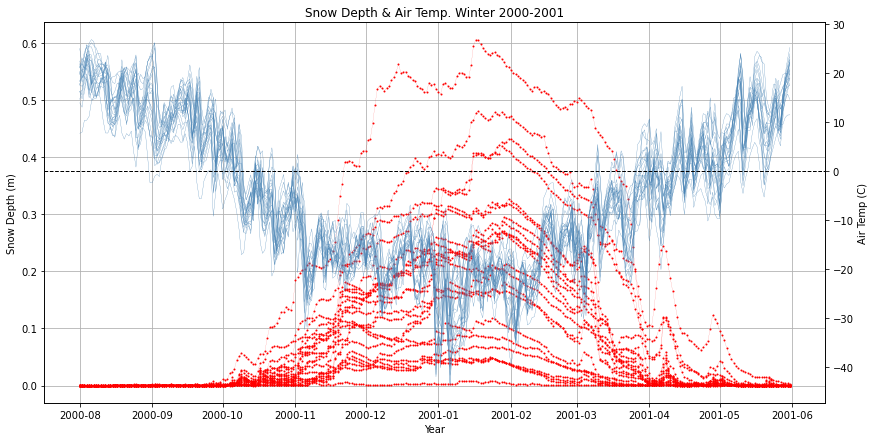

In [68]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2000-2001', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

In [69]:
#Divide into winters e.g. Aug 2001-May 2002
#
day_mean_W01_02_df1 = day_mean_df1.loc['08-2001' : '05-2002']
day_mean_W01_02_df1

Arkhangai  BayanUlgii  Bayankhongor        Bulgan  \
DateTime                                                           
2001-08-01  4.902471e-06    0.000207  0.000000e+00  8.223298e-05   
2001-08-02  8.510589e-06    0.000135  0.000000e+00  1.020512e-04   
2001-08-03  1.427643e-05    0.000099  1.349472e-08  1.234810e-04   
2001-08-04  1.528098e-05    0.000072  5.397888e-08  1.462304e-04   
2001-08-05  1.521735e-05    0.000043  1.020109e-07  1.359948e-04   
...                  ...         ...           ...           ...   
2002-05-27  2.083875e-06    0.001466  5.258367e-07  7.352155e-06   
2002-05-28  1.263236e-07    0.001275  5.397888e-08  4.066494e-06   
2002-05-29  0.000000e+00    0.001124  0.000000e+00  7.875108e-07   
2002-05-30  0.000000e+00    0.001053  0.000000e+00  3.220934e-07   
2002-05-31  0.000000e+00    0.000768  0.000000e+00  1.772285e-07   

              DarkhanUul  Dornod  Dornogovi  Dundgovi     GoviAltai  \
DateTime                                                              
2001-08-01  1.100876e-04     0.0        0.0       0.0  0.000000e+00   
2001-08-02  1.774528e-04     0.0        0.0       0.0  0.000000e+00   
2001-08-03  2.352561e-04     0.0        0.0       0.0  0.000000e+00   
2001-08-04  3.125067e-04     0.0        0.0       0.0  0.000000e+00   
2001-08-05  2.960580e-04     0.0        0.0       0.0  0.000000e+00   
...                  ...     ...        ...       ...           ...   
2002-05-27  6.462264e-06     0.0        0.0       0.0  1.128022e-07   
2002-05-28  1.185984e-06     0.0        0.0       0.0  0.000000e+00   
2002-05-29  1.482480e-07     0.0        0.0       0.0  0.000000e+00   
2002-05-30  0.000000e+00     0.0        0.0       0.0  0.000000e+00   
2002-05-31  0.000000e+00     0.0        0.0       0.0  0.000000e+00   

            Govisumber  ...  Khuvsgul  Orkhon   Selenge  Sukhbaatar       Tuv  \
DateTime                ...                                                     
2001-08-01         0.0  ...  0.000255     0.0  0.000115         0.0  0.000039   
2001-08-02         0.0  ...  0.000321     0.0  0.000146         0.0  0.000038   
2001-08-03         0.0  ...  0.000449     0.0  0.000186         0.0  0.000038   
2001-08-04         0.0  ...  0.000472     0.0  0.000236         0.0  0.000045   
2001-08-05         0.0  ...  0.000445     0.0  0.000226         0.0  0.000044   
...                ...  ...       ...     ...       ...         ...       ...   
2002-05-27         0.0  ...  0.000079     0.0  0.000057         0.0  0.000051   
2002-05-28         0.0  ...  0.000045     0.0  0.000026         0.0  0.000015   
2002-05-29         0.0  ...  0.000029     0.0  0.000015         0.0  0.000010   
2002-05-30         0.0  ...  0.000021     0.0  0.000006         0.0  0.000002   
2002-05-31         0.0  ...  0.000020     0.0  0.000004         0.0  0.000000   

            Ulaanbaatar  Umnugovi       Uvs  Uvurkhangai       Zavkhan  
DateTime                                                                
2001-08-01     0.000017       0.0  0.000283          0.0  7.698929e-06  
2001-08-02     0.000013       0.0  0.000146          0.0  1.334393e-05  
2001-08-03     0.000009       0.0  0.000063          0.0  1.418296e-05  
2001-08-04     0.000009       0.0  0.000039          0.0  2.152962e-05  
2001-08-05     0.000009       0.0  0.000026          0.0  3.327268e-05  
...                 ...       ...       ...          ...           ...  
2002-05-27     0.000108       0.0  0.000011          0.0  8.362741e-08  
2002-05-28     0.000016       0.0  0.000010          0.0  0.000000e+00  
2002-05-29     0.000007       0.0  0.000004          0.0  0.000000e+00  
2002-05-30     0.000000       0.0  0.000003          0.0  0.000000e+00  
2002-05-31     0.000000       0.0  0.000001          0.0  0.000000e+00  

[304 rows x 22 columns]

In [71]:
#Divide into winters e.g. Aug 2001-May 2002
#
day_mean_W01_02_df2 = df2.loc['08-2001' : '05-2002']
day_mean_W01_02_df2

Arkhangai  BayanUlgii  Bayankhongor     Bulgan  DarkhanUul  \
DateTime                                                                 
2001-08-01  14.978597    8.335105     19.369356  12.786319   14.853698   
2001-08-02  13.011132    8.543731     19.409495  11.143232   12.937846   
2001-08-03  12.370202   10.238873     20.347754  12.474492   12.051149   
2001-08-04  10.859343   12.175817     17.050726  15.466306   15.942851   
2001-08-05  13.232224   12.357197     18.196420  17.420097   17.296829   
...               ...         ...           ...        ...         ...   
2002-05-27  17.527260    9.377677     21.068197  21.855777   23.197656   
2002-05-28  18.432335    9.601641     22.131227  20.277665   20.792832   
2002-05-29  18.243213    9.330931     21.963734  20.056637   20.848060   
2002-05-30  17.533658    9.612831     21.390505  19.823398   20.186199   
2002-05-31  17.584844    9.403476     20.318054  20.913562   21.626246   

               Dornod  Dornogovi   Dundgovi  GoviAltai  Govisumber  ...  \
DateTime                                                            ...   
2001-08-01  25.665119  26.431563  25.471960  18.718010   25.835993  ...   
2001-08-02  23.191953  27.786474  25.058001  19.698340   25.127800  ...   
2001-08-03  20.473350  26.198528  20.554485  21.082972   20.632368  ...   
2001-08-04  17.295765  19.657138  17.705276  19.662050   16.749193  ...   
2001-08-05  17.751792  20.092551  18.538084  21.275454   17.895928  ...   
...               ...        ...        ...        ...         ...  ...   
2002-05-27  17.309492  25.404304  24.549612  20.973517   23.698824  ...   
2002-05-28  18.753102  24.228805  23.702742  22.051983   22.444966  ...   
2002-05-29  19.751825  25.755224  25.671680  21.284834   24.192056  ...   
2002-05-30  22.387721  27.240414  26.132474  20.794146   24.280599  ...   
2002-05-31  24.648649  26.317665  24.787408  20.783708   23.507859  ...   

             Khuvsgul     Orkhon    Selenge  Sukhbaatar        Tuv  \
DateTime                                                             
2001-08-01  10.979168  11.480118  14.372754   23.869049  20.586636   
2001-08-02   9.582727  10.146473  12.749508   23.980759  17.705669   
2001-08-03  11.227320  11.298304  12.073327   23.888383  13.328203   
2001-08-04  12.098666  15.776988  15.804241   15.444735  14.402170   
2001-08-05  13.709228  17.436717  17.036128   17.188575  15.408553   
...               ...        ...        ...         ...        ...   
2002-05-27  17.100257  22.219100  22.511830   20.251856  21.494311   
2002-05-28  16.284113  19.846203  20.169707   21.157085  20.699426   
2002-05-29  16.161830  19.445550  20.035354   20.853712  22.334362   
2002-05-30  16.139689  19.065695  19.728619   21.205187  21.667318   
2002-05-31  16.732250  20.386235  21.034050   22.734075  21.368039   

            Ulaanbaatar   Umnugovi        Uvs  Uvurkhangai    Zavkhan  
DateTime                                                               
2001-08-01    21.021058  25.466556  12.227202    19.497093  14.433934  
2001-08-02    17.731227  25.247388  15.051074    19.208197  14.720474  
2001-08-03    11.870905  25.221036  15.640345    17.408219  14.738233  
2001-08-04    13.462413  21.170115  17.348449    14.707834  13.028367  
2001-08-05    14.146215  20.929114  19.877054    16.760032  15.849968  
...                 ...        ...        ...          ...        ...  
2002-05-27    20.186704  24.155260  18.358024    20.682749  16.948174  
2002-05-28    19.444147  24.987605  19.256602    21.858380  17.636543  
2002-05-29    21.565852  25.890126  18.101709    22.895613  16.690387  
2002-05-30    20.317434  26.677807  18.718369    22.461834  16.371618  
2002-05-31    20.068820  25.501682  18.440462    21.001742  16.962799  

[304 rows x 22 columns]

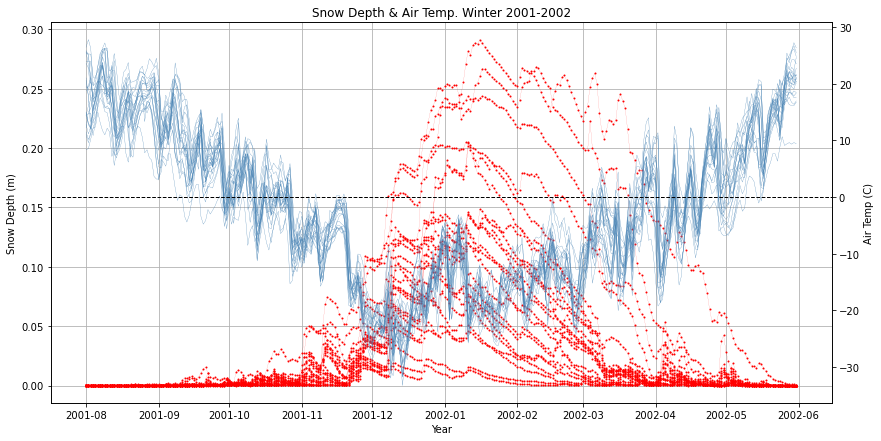

In [74]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W01_02_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W01_02_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2001-2002', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

In [81]:
#Divide into winters e.g. Aug 2002-May 2003
#
day_mean_W02_03_df1 = day_mean_df1.loc['08-2002' : '05-2003']
day_mean_W02_03_df1

Arkhangai    BayanUlgii  Bayankhongor    Bulgan    DarkhanUul  \
DateTime                                                                    
2002-08-01   0.000008  1.871150e-06  1.423121e-06  0.000010  0.000000e+00   
2002-08-02   0.000012  4.684653e-07  1.059679e-06  0.000012  0.000000e+00   
2002-08-03   0.000006  0.000000e+00  4.002671e-07  0.000009  0.000000e+00   
2002-08-04   0.000000  1.528151e-05  0.000000e+00  0.000000  0.000000e+00   
2002-08-05   0.000000  2.987876e-05  0.000000e+00  0.000000  0.000000e+00   
...               ...           ...           ...       ...           ...   
2003-05-27   0.001179  1.195264e-04  1.149987e-03  0.000043  2.620620e-05   
2003-05-28   0.000317  2.002429e-04  2.954182e-04  0.000023  6.354447e-06   
2003-05-29   0.000104  2.696891e-04  9.868301e-05  0.000014  1.185984e-06   
2003-05-30   0.000037  1.390534e-04  4.003426e-05  0.000009  1.185984e-06   
2003-05-31   0.000015  6.106153e-05  1.773778e-05  0.000006  2.964959e-07   

                  Dornod  Dornogovi  Dundgovi  GoviAltai  Govisumber  ...  \
DateTime                                                              ...   
2002-08-01  0.000000e+00        0.0       0.0   0.000000         0.0  ...   
2002-08-02  0.000000e+00        0.0       0.0   0.000000         0.0  ...   
2002-08-03  0.000000e+00        0.0       0.0   0.000000         0.0  ...   
2002-08-04  0.000000e+00        0.0       0.0   0.000000         0.0  ...   
2002-08-05  0.000000e+00        0.0       0.0   0.000000         0.0  ...   
...                  ...        ...       ...        ...         ...  ...   
2003-05-27  1.272597e-06        0.0       0.0   0.000096         0.0  ...   
2003-05-28  1.407004e-07        0.0       0.0   0.000027         0.0  ...   
2003-05-29  0.000000e+00        0.0       0.0   0.000009         0.0  ...   
2003-05-30  0.000000e+00        0.0       0.0   0.000004         0.0  ...   
2003-05-31  0.000000e+00        0.0       0.0   0.000002         0.0  ...   

            Khuvsgul  Orkhon       Selenge    Sukhbaatar           Tuv  \
DateTime                                                                 
2002-08-01  0.000087     0.0  0.000000e+00  0.000000e+00  5.311853e-07   
2002-08-02  0.000074     0.0  6.743128e-08  0.000000e+00  7.509378e-07   
2002-08-03  0.000050     0.0  1.078900e-07  0.000000e+00  0.000000e+00   
2002-08-04  0.000019     0.0  0.000000e+00  0.000000e+00  0.000000e+00   
2002-08-05  0.000008     0.0  0.000000e+00  0.000000e+00  0.000000e+00   
...              ...     ...           ...           ...           ...   
2003-05-27  0.000289     0.0  1.768676e-04  1.067057e-07  1.979508e-04   
2003-05-28  0.000131     0.0  9.958720e-05  1.376665e-05  1.068704e-04   
2003-05-29  0.000071     0.0  5.705390e-05  2.389630e-06  5.939722e-05   
2003-05-30  0.000038     0.0  3.823647e-05  1.979842e-07  3.848469e-05   
2003-05-31  0.000017     0.0  2.489211e-05  4.949604e-08  2.564771e-05   

            Ulaanbaatar      Umnugovi           Uvs   Uvurkhangai   Zavkhan  
DateTime                                                                     
2002-08-01     0.000000  0.000000e+00  5.799672e-07  0.000000e+00  0.000000  
2002-08-02     0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000  
2002-08-03     0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000  
2002-08-04     0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000  
2002-08-05     0.000000  0.000000e+00  1.353257e-06  0.000000e+00  0.000000  
...                 ...           ...           ...           ...       ...  
2003-05-27     0.000122  0.000000e+00  5.276224e-05  2.641230e-07  0.000500  
2003-05-28     0.000052  0.000000e+00  1.924165e-05  3.928788e-05  0.000111  
2003-05-29     0.000028  0.000000e+00  6.534677e-06  1.153309e-05  0.000036  
2003-05-30     0.000020  4.286579e-08  5.896334e-06  3.079893e-06  0.000014  
2003-05-31     0.000013  0.000000e+00  2.803175e-06  1.673901e-07  0.000005  

[304 rows x 22 columns]

In [83]:
#Divide into winters e.g. Aug 2002-May 2003
#
day_mean_W02_03_df2 = df2.loc['08-2002' : '05-2003']
day_mean_W02_03_df2

Arkhangai  BayanUlgii  Bayankhongor     Bulgan  DarkhanUul  \
DateTime                                                                 
2002-08-01  12.055858   12.267148     19.367621  12.198102   11.236954   
2002-08-02  12.831323   11.935819     17.347166  12.929594   11.372140   
2002-08-03  14.212581   11.188100     17.886381  16.206484   15.651999   
2002-08-04  15.856307   11.692833     17.586299  16.105163   15.387114   
2002-08-05  13.721474   14.959467     18.523744  17.381342   19.711801   
...               ...         ...           ...        ...         ...   
2003-05-27  15.840506    3.699192     16.583707  19.744182   22.130241   
2003-05-28  14.334522    5.647025     16.338642  19.423578   21.060019   
2003-05-29  12.562032    6.746141     17.293324  17.142056   19.219320   
2003-05-30  10.226043    9.408810     15.901327  12.340992   13.297477   
2003-05-31  15.044987   11.252779     16.469931  16.402807   16.891186   

               Dornod  Dornogovi   Dundgovi  GoviAltai  Govisumber  ...  \
DateTime                                                            ...   
2002-08-01  20.101032  22.002446  18.711830  20.028953   16.595708  ...   
2002-08-02  15.894126  16.558853  14.230438  21.275215   13.448558  ...   
2002-08-03  15.495390  17.413028  15.862680  20.909872   15.617759  ...   
2002-08-04  18.285609  18.125162  18.346702  19.903957   16.593037  ...   
2002-08-05  19.129527  20.259127  17.778392  19.940079   18.370320  ...   
...               ...        ...        ...        ...         ...  ...   
2003-05-27  19.814891  23.277997  21.216105  16.641173   21.941653  ...   
2003-05-28  21.176416  24.170575  20.785578  17.271012   22.099134  ...   
2003-05-29  20.810132  24.055755  20.971311  18.882170   21.066117  ...   
2003-05-30  19.079832  20.279411  17.400488  19.122120   16.842902  ...   
2003-05-31  17.011348  17.053253  16.718324  20.607838   15.311463  ...   

             Khuvsgul     Orkhon    Selenge  Sukhbaatar        Tuv  \
DateTime                                                             
2002-08-01   8.841008  10.545490  11.119551   20.472707  12.846216   
2002-08-02  13.511177  11.689629  11.293475   12.788041  10.140069   
2002-08-03  13.919794  15.402662  15.774236   13.764296  14.418571   
2002-08-04  13.189795  14.152438  15.111326   16.075548  16.336510   
2002-08-05  13.778032  17.543728  18.984432   17.207251  17.797934   
...               ...        ...        ...         ...        ...   
2003-05-27  14.567775  19.589480  21.287134   21.334756  20.469140   
2003-05-28  11.928087  19.699841  20.562029   19.118472  19.710772   
2003-05-29  10.073334  18.177005  18.471709   18.240363  17.951176   
2003-05-30   8.977046  12.073148  12.607918   18.641934  14.195629   
2003-05-31  12.728558  16.429628  16.323414   16.188684  15.109898   

            Ulaanbaatar   Umnugovi        Uvs  Uvurkhangai    Zavkhan  
DateTime                                                               
2002-08-01    11.373180  24.661033  14.434175    16.957928  13.015460  
2002-08-02     8.774081  18.464108  18.024528    13.492580  17.042277  
2002-08-03    13.505313  18.259975  18.067696    15.791664  16.474610  
2002-08-04    13.696147  19.646290  17.986820    17.111541  15.211823  
2002-08-05    17.158380  20.818356  19.965865    17.557778  15.831455  
...                 ...        ...        ...          ...        ...  
2003-05-27    19.671214  18.301765  12.373178    17.575520  13.521793  
2003-05-28    19.948711  20.015595  12.919628    17.019300  12.600234  
2003-05-29    17.158539  21.515316  14.190664    17.011852  13.936802  
2003-05-30    14.060589  20.935693  15.765199    13.609580  13.478650  
2003-05-31    13.796040  18.309365  18.275645    15.452231  17.276037  

[304 rows x 22 columns]

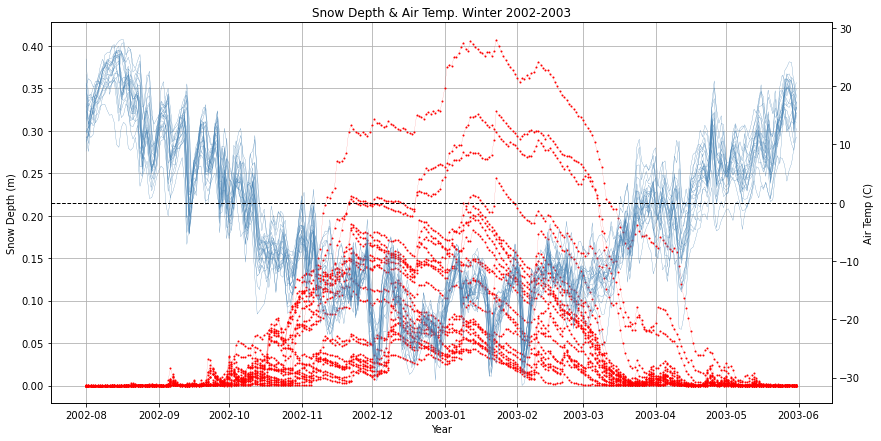

In [84]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W02_03_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W02_03_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2002-2003', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

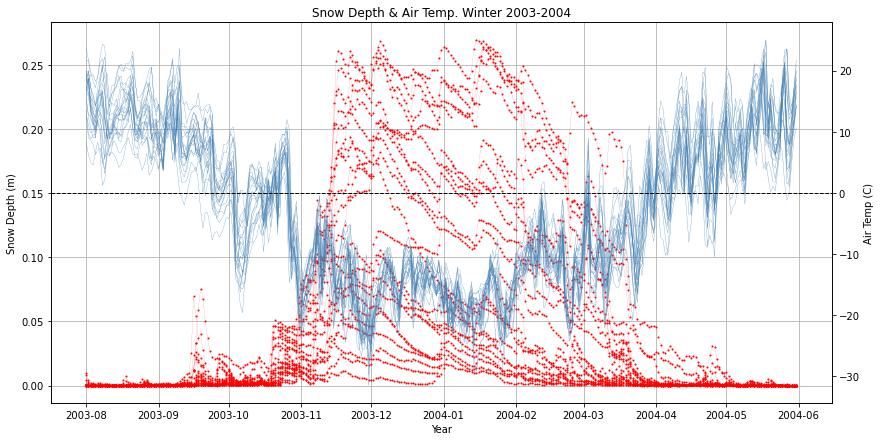

In [85]:
#Divide into winters e.g. Aug 2003-May 2004
#
day_mean_W03_04_df1 = day_mean_df1.loc['08-2003' : '05-2004']
day_mean_W03_04_df2 = df2.loc['08-2003' : '05-2004']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W03_04_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W03_04_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2003-2004', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

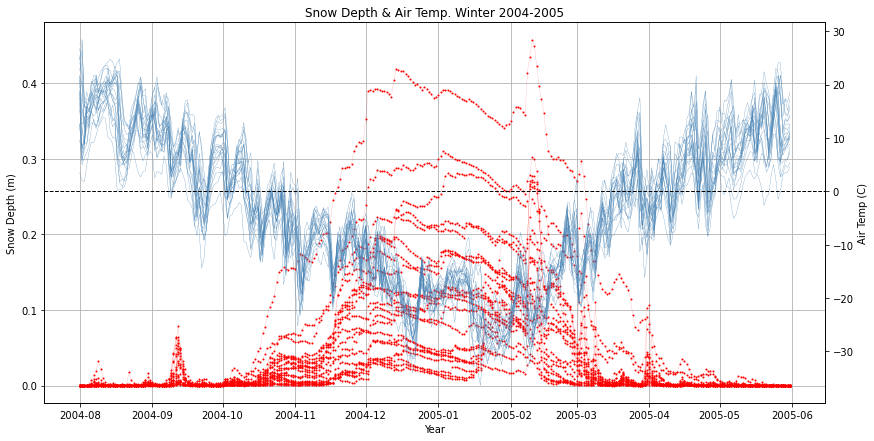

In [86]:
#Divide into winters e.g. Aug 2004-May 2005
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2004' : '05-2005']
day_mean_W04_05_df2 = df2.loc['08-2004' : '05-2005']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2004-2005', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

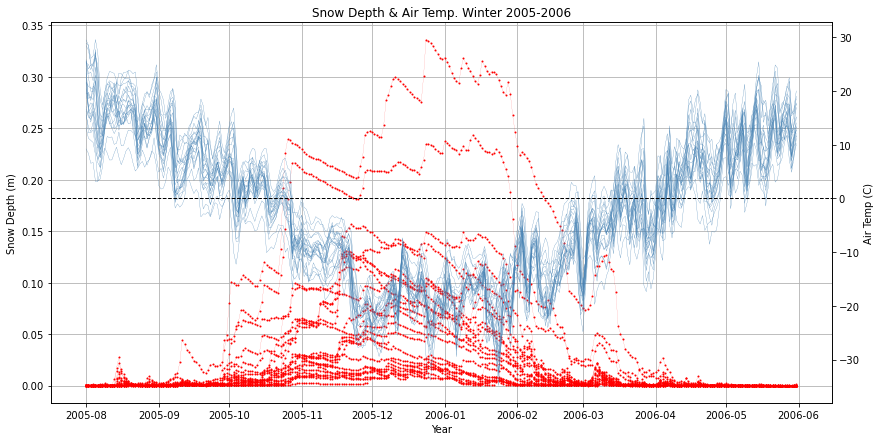

In [87]:
#Divide into winters e.g. Aug 2005-May 2006
#
day_mean_W05_06_df1 = day_mean_df1.loc['08-2005' : '05-2006']
day_mean_W05_06_df2 = df2.loc['08-2005' : '05-2006']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W05_06_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W05_06_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2005-2006', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

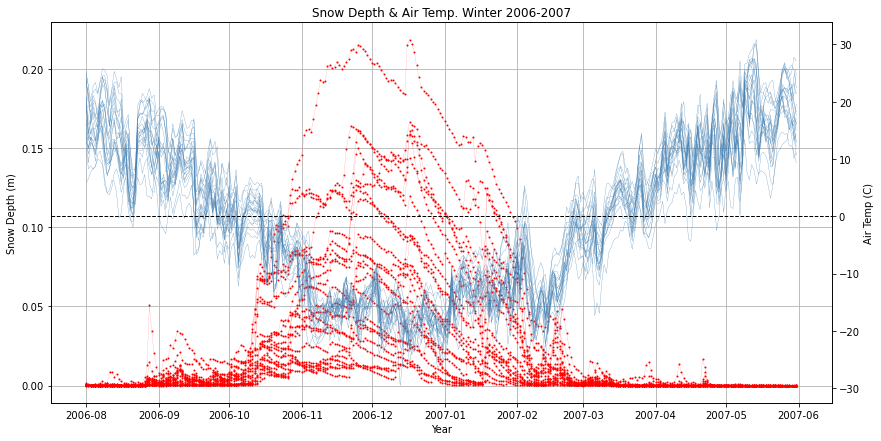

In [88]:
#Divide into winters e.g. Aug 2006-May 2007
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2006' : '05-2007']
day_mean_W04_05_df2 = df2.loc['08-2006' : '05-2007']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2006-2007', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

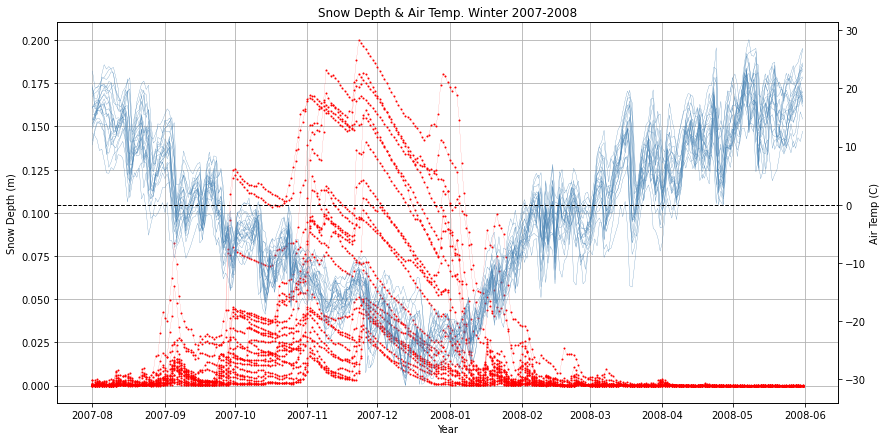

In [89]:
#Divide into winters e.g. Aug 2007-May 2008
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2007' : '05-2008']
day_mean_W04_05_df2 = df2.loc['08-2007' : '05-2008']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2007-2008', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

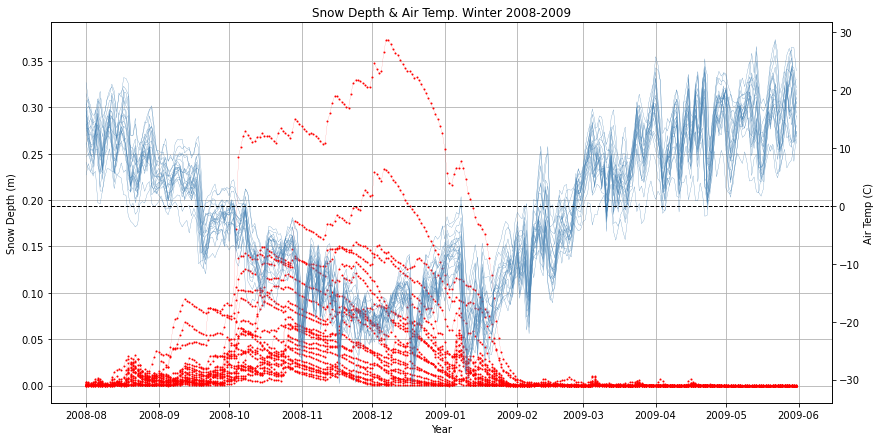

In [90]:
#Divide into winters e.g. Aug 2008-May 2009
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2008' : '05-2009']
day_mean_W04_05_df2 = df2.loc['08-2008' : '05-2009']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2008-2009', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

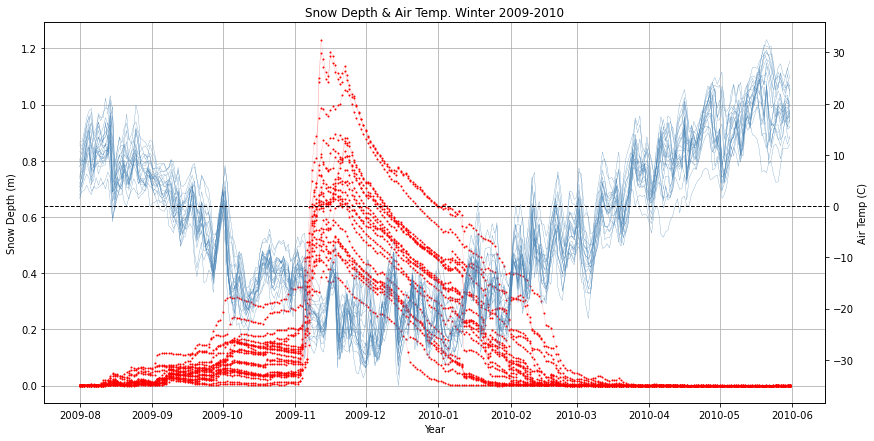

In [91]:
#Divide into winters e.g. Aug 2009-May 2010
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2009' : '05-2010']
day_mean_W04_05_df2 = df2.loc['08-2009' : '05-2010']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2009-2010', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

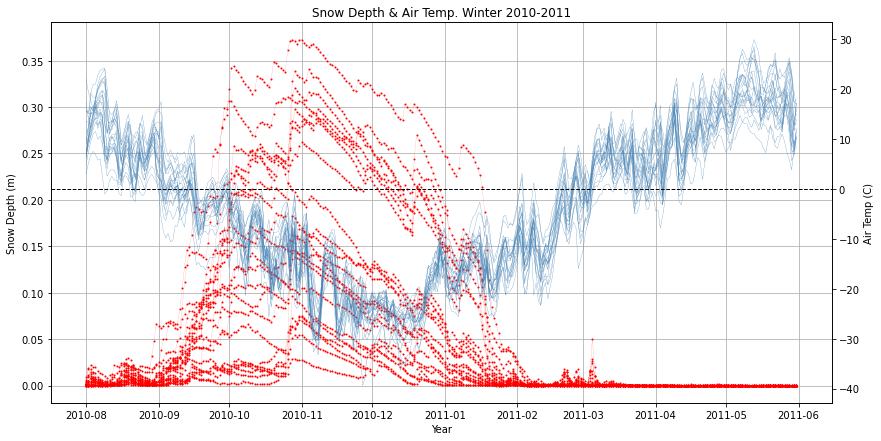

In [92]:
#Divide into winters e.g. Aug 2010-May 2011
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2010' : '05-2011']
day_mean_W04_05_df2 = df2.loc['08-2010' : '05-2011']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2010-2011', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

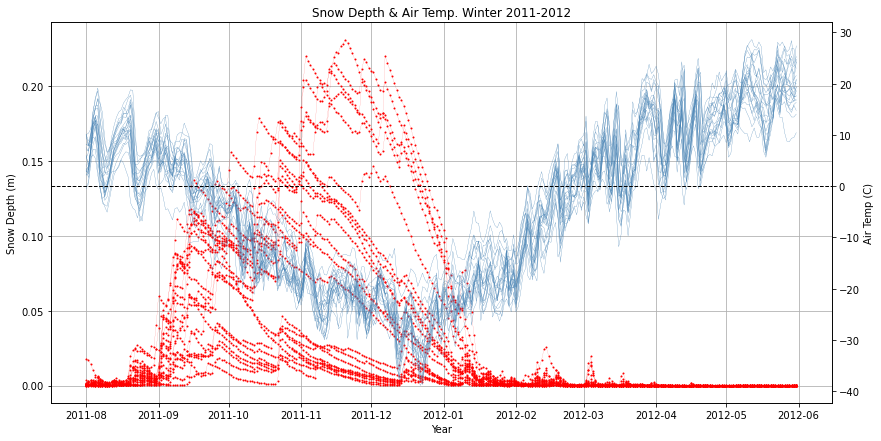

In [93]:
#Divide into winters e.g. Aug 2011-May 2012
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2011' : '05-2012']
day_mean_W04_05_df2 = df2.loc['08-2011' : '05-2012']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2011-2012', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

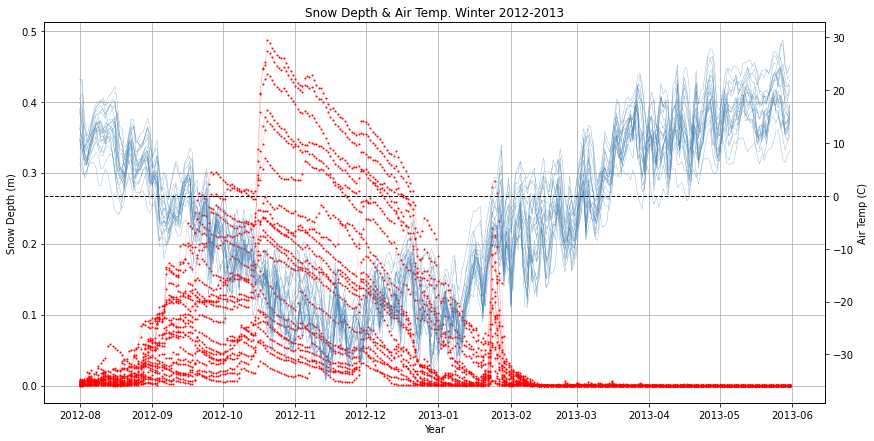

In [94]:
#Divide into winters e.g. Aug 2012-May 2013
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2012' : '05-2013']
day_mean_W04_05_df2 = df2.loc['08-2012' : '05-2013']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2012-2013', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

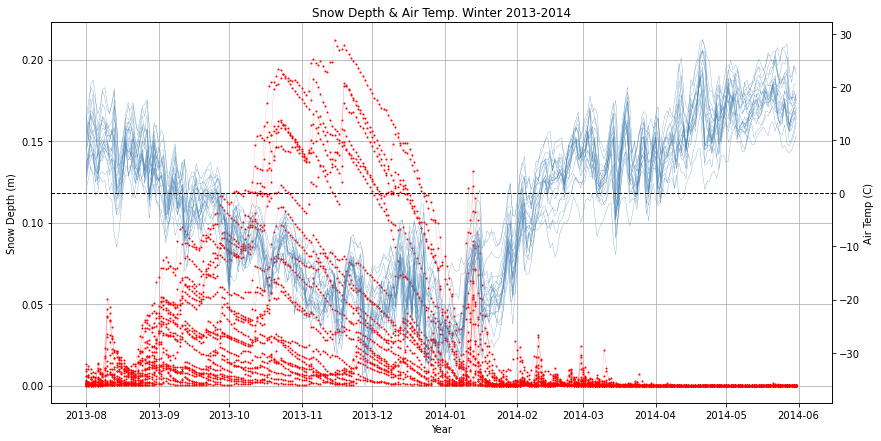

In [95]:
#Divide into winters e.g. Aug 2013-May 2014
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2013' : '05-2014']
day_mean_W04_05_df2 = df2.loc['08-2013' : '05-2014']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2013-2014', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

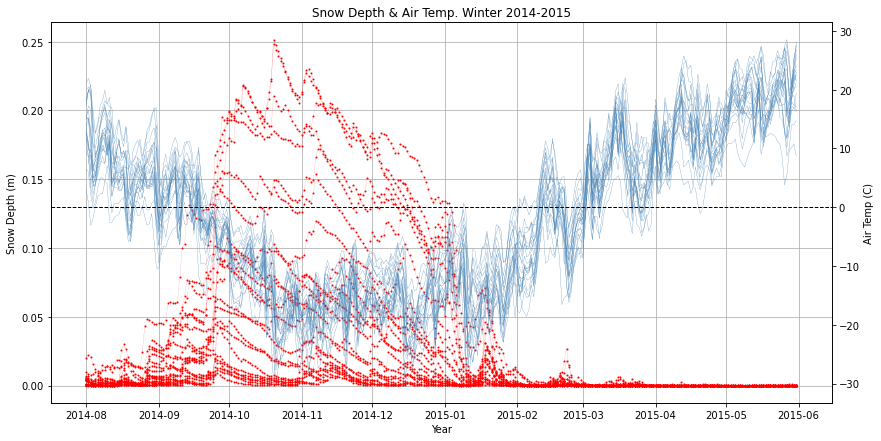

In [96]:
#Divide into winters e.g. Aug 2009-May 2015
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2014' : '05-2015']
day_mean_W04_05_df2 = df2.loc['08-2014' : '05-2015']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2014-2015', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

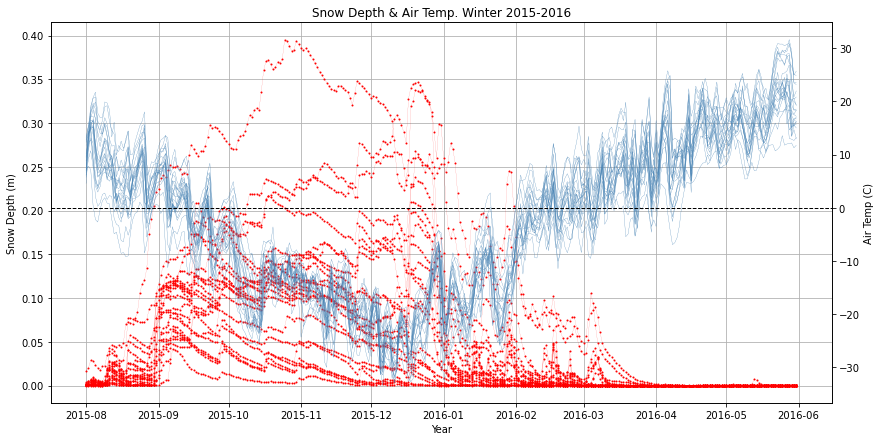

In [97]:
#Divide into winters e.g. Aug 2009-May 2016
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2015' : '05-2016']
day_mean_W04_05_df2 = df2.loc['08-2015' : '05-2016']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2015-2016', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

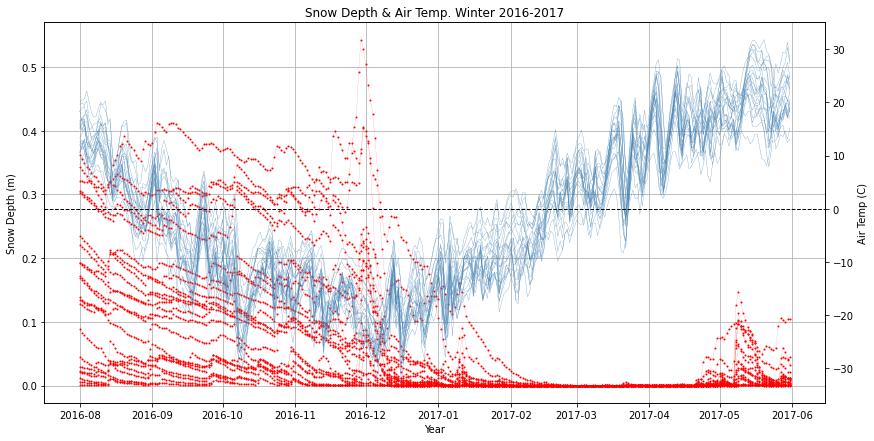

In [98]:
#Divide into winters e.g. Aug 2009-May 2017
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2016' : '05-2017']
day_mean_W04_05_df2 = df2.loc['08-2016' : '05-2017']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2016-2017', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

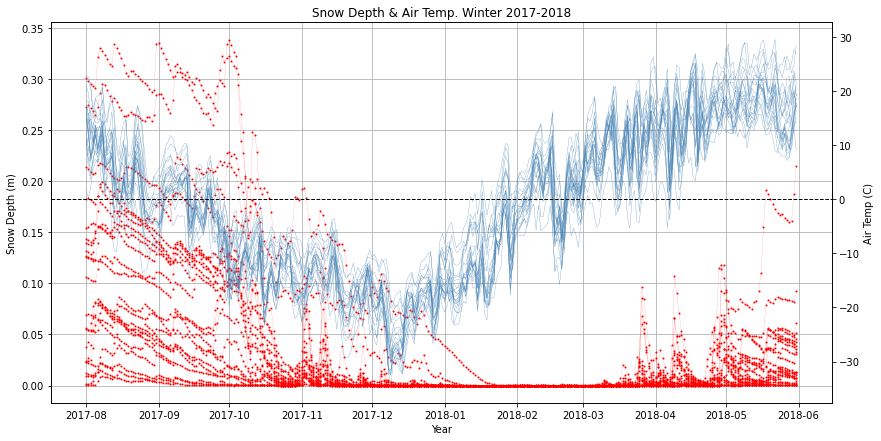

In [99]:
#Divide into winters e.g. Aug 2009-May 2018
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2017' : '05-2018']
day_mean_W04_05_df2 = df2.loc['08-2017' : '05-2018']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2017-2018', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

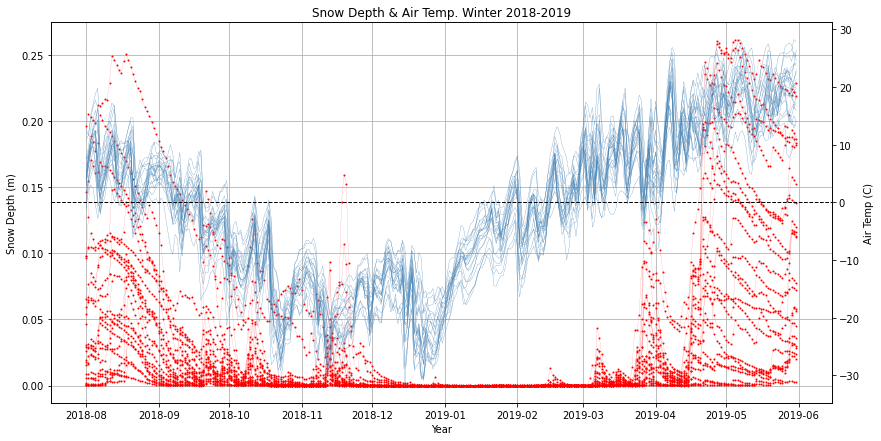

In [100]:
#Divide into winters e.g. Aug 2009-May 2019
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2018' : '05-2019']
day_mean_W04_05_df2 = df2.loc['08-2018' : '05-2019']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2018-2019', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

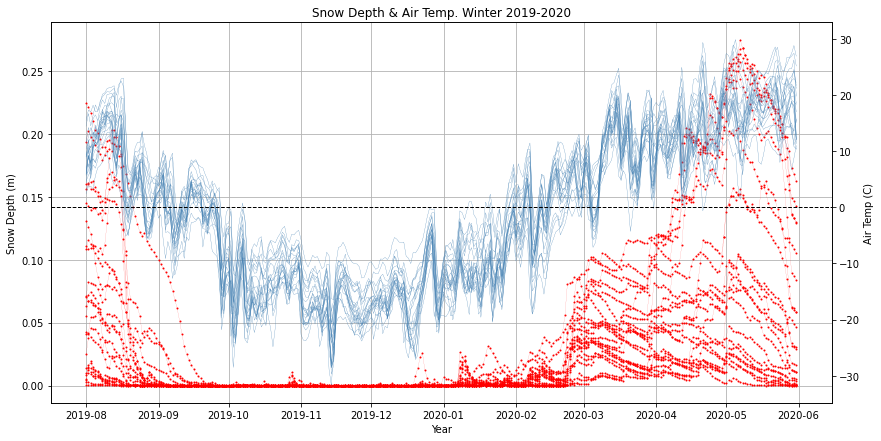

In [101]:
#Divide into winters e.g. Aug 2019-May 2020
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2019' : '05-2020']
day_mean_W04_05_df2 = df2.loc['08-2019' : '05-2020']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2019-2020', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

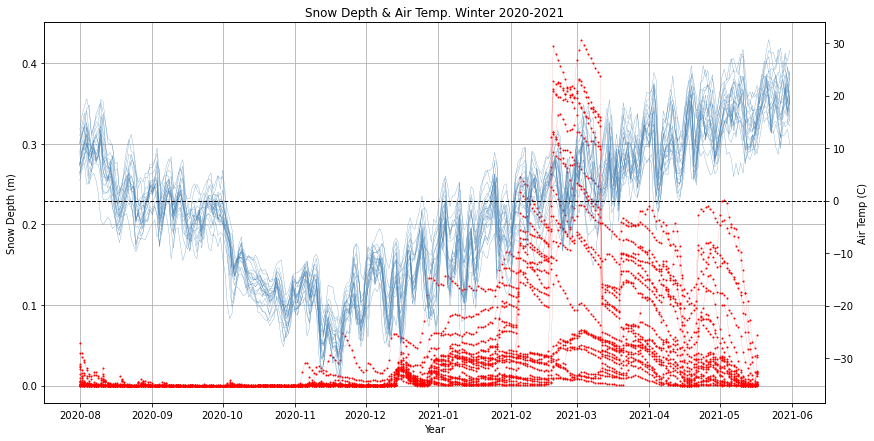

In [102]:
#Divide into winters e.g. Aug 2020-May 2021
#
day_mean_W04_05_df1 = day_mean_df1.loc['08-2020' : '05-2021']
day_mean_W04_05_df2 = df2.loc['08-2020' : '05-2021']

#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add first line to plot
ax.plot(day_mean_W04_05_df1, label='Snow Depth', color='red', linewidth=0.1, marker=".", markersize=2)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(day_mean_W04_05_df2, label='Air Temp', color='steelblue', linewidth=0.25)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. Winter 2020-2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

In [104]:
df1.tail(20)

Arkhangai  BayanUlgii  Bayankhongor    Bulgan  \
DateTime                                                             
2021-05-15 09:00:00   0.006642    0.032745      0.000808  0.000525   
2021-05-15 12:00:00   0.006241    0.031633      0.000756  0.000447   
2021-05-15 15:00:00   0.006231    0.031609      0.000753  0.000440   
2021-05-15 18:00:00   0.005766    0.034289      0.000677  0.000409   
2021-05-15 21:00:00   0.004597    0.032740      0.000516  0.000354   
2021-05-16 00:00:00   0.003759    0.030777      0.000386  0.000295   
2021-05-16 03:00:00   0.003386    0.038420      0.000313  0.000278   
2021-05-16 06:00:00   0.003372    0.039323      0.000306  0.000277   
2021-05-16 09:00:00   0.003525    0.039366      0.000305  0.000277   
2021-05-16 12:00:00   0.003832    0.039422      0.000308  0.000277   
2021-05-16 15:00:00   0.003375    0.037499      0.000241  0.000201   
2021-05-16 18:00:00   0.003119    0.036334      0.000190  0.000179   
2021-05-16 21:00:00   0.003072    0.036225      0.000179  0.000239   
2021-05-17 00:00:00   0.003100    0.037067      0.000181  0.001024   
2021-05-17 03:00:00   0.004558    0.039755      0.000181  0.001709   
2021-05-17 06:00:00   0.007534    0.040299      0.000177  0.003062   
2021-05-17 09:00:00   0.017269    0.038307      0.000541  0.014380   
2021-05-17 12:00:00   0.026892    0.037231      0.001034  0.031798   
2021-05-17 15:00:00   0.030476    0.037139      0.001075  0.033557   
2021-05-17 18:00:00   0.031174    0.037048      0.001062  0.033766   

                     DarkhanUul    Dornod  Dornogovi  Dundgovi  GoviAltai  \
DateTime                                                                    
2021-05-15 09:00:00    0.000185  0.000652   0.000000  0.000000   0.000000   
2021-05-15 12:00:00    0.000090  0.000482   0.000000  0.000000   0.000000   
2021-05-15 15:00:00    0.000087  0.000420   0.000000  0.000000   0.000000   
2021-05-15 18:00:00    0.000083  0.000265   0.000000  0.000000   0.000000   
2021-05-15 21:00:00    0.000055  0.000143   0.000000  0.000000   0.000000   
2021-05-16 00:00:00    0.000050  0.000101   0.000000  0.000000   0.000000   
2021-05-16 03:00:00    0.000047  0.000080   0.000000  0.000000   0.000000   
2021-05-16 06:00:00    0.000000  0.000080   0.000000  0.000000   0.000000   
2021-05-16 09:00:00    0.000000  0.000080   0.000000  0.000000   0.000010   
2021-05-16 12:00:00    0.000000  0.000077   0.000000  0.000000   0.000058   
2021-05-16 15:00:00    0.000000  0.000042   0.000000  0.000000   0.000000   
2021-05-16 18:00:00    0.000000  0.000026   0.000000  0.000000   0.000000   
2021-05-16 21:00:00    0.000099  0.000023   0.000000  0.000000   0.000000   
2021-05-17 00:00:00    0.000129  0.000013   0.000000  0.000000   0.000000   
2021-05-17 03:00:00    0.000291  0.000063   0.000000  0.000003   0.000000   
2021-05-17 06:00:00    0.000195  0.000130   0.000000  0.000000   0.000119   
2021-05-17 09:00:00    0.000000  0.000058   0.000000  0.000000   0.000899   
2021-05-17 12:00:00    0.000038  0.000045   0.000000  0.000040   0.000511   
2021-05-17 15:00:00    0.000043  0.000045   0.000000  0.001244   0.000487   
2021-05-17 18:00:00    0.000144  0.000138   0.000307  0.008826   0.000490   

                     Govisumber  ...  Khuvsgul    Orkhon   Selenge  \
DateTime                         ...                                 
2021-05-15 09:00:00    0.000000  ...  0.049490  0.000000  0.002315   
2021-05-15 12:00:00    0.000000  ...  0.048726  0.000000  0.002103   
2021-05-15 15:00:00    0.000000  ...  0.048817  0.000000  0.002128   
2021-05-15 18:00:00    0.000000  ...  0.048174  0.000000  0.001968   
2021-05-15 21:00:00    0.000000  ...  0.045018  0.000000  0.001750   
2021-05-16 00:00:00    0.000000  ...  0.042230  0.000000  0.001534   
2021-05-16 03:00:00    0.000000  ...  0.042687  0.000000  0.001416   
2021-05-16 06:00:00    0.000000  ...  0.042857  0.000000  0.001399   
2021-05-16 09:00:00    0.000000  ...  0.046779  0.000000  0.001398   
2021-05-16 12:0